# Top 1000 best movies according to IMDB

In [217]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns

In [218]:
movies = pd.read_csv("imdb_top_1000.csv")
movies.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Number_of_Movies
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",1
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",1
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",1
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",1
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",1


### Probably we don't need the column with the poster, it makes the dataframe slighly convoluted.

In [219]:
movies.drop(columns=["Poster_Link"], inplace=True)

### Some of the entries have a NaN value for 'Gross', we can change that value for a '0'.
### We need to convert the 'Gross' column into integers, but before we have to delete commas from its values

In [220]:
movies.fillna(0, inplace=True)
columns_to_clean = ["Gross"]

chars_to_remove = [",", " "]
for col in columns_to_clean:
    for char in chars_to_remove:
        movies[col] = movies[col].astype(str).str.replace(char, "")
    movies[col] = pd.to_numeric(movies[col])

### We also need to convert the column 'Released_Year" to datetime objects.

In [221]:
movies.Released_Year=pd.to_numeric(movies.Released_Year)

### It would help to simplify the 'Genre' column, as we will use it further on.

In [311]:
movies.Genre = movies.Genre.str.split(",").str[0]

### Finally, we need to turn the values in the 'Gross' column into integers

In [223]:
movies["Gross"] = pd.to_numeric(movies["Gross"])

### And finally, our dataframe looks like this:

In [312]:
movies

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Number_of_Movies
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,1
1,The Godfather,1972,A,175 min,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,1
2,The Dark Knight,2008,UA,152 min,Action,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,1
3,The Godfather: Part II,1974,A,202 min,Crime,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,1
4,12 Angry Men,1957,U,96 min,Crime,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Giant,1956,G,201 min,Drama,7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,0,1
997,From Here to Eternity,1953,Passed,118 min,Drama,7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000,1
998,Lifeboat,1944,0,97 min,Drama,7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,0,1
999,The 39 Steps,1935,0,86 min,Crime,7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,0,1


### Now we can start playing with the data
### What was the golden age of Cinema, according to critics and audience?
### We can group all movies by year, and sum the IMDB ratings, Metascores and viewers' votes (without making an average) to see which year takes more attention.

In [224]:
by_year = movies.groupby("Released_Year").sum()
by_year.sort_values("Released_Year", ascending=False, inplace=True)
by_year.tail(5)

,IMDB_Rating,Meta_score,No_of_Votes,Gross,Number_of_Movies
Released_Year,,,,,
1925,16.2,97.0,154107,5500970,2
1924,8.2,0.0,41985,977375,1
1922,7.9,0.0,88794,0,1
1921,8.3,0.0,113314,5450000,1
1920,8.1,0.0,57428,0,1


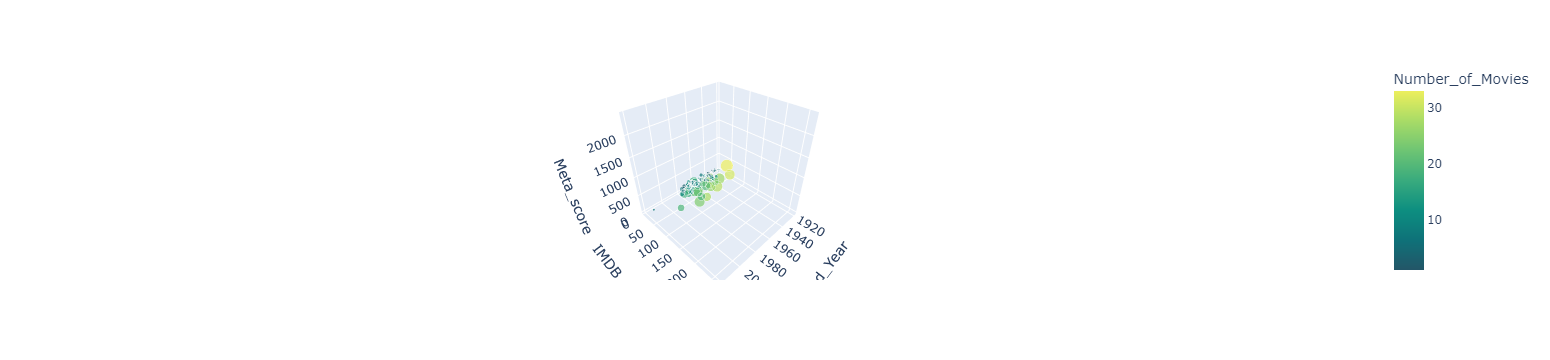

In [225]:
fig = px.scatter_3d(by_year,
                    x=by_year.index,
                    y=by_year.IMDB_Rating,
                    z=by_year.Meta_score,
                    color=by_year.Number_of_Movies,
                    size=by_year.No_of_Votes,
                    hover_name=by_year.index,
                    color_continuous_scale='Aggrnyl')
fig.show()

### 2014 smashes other years, with a bigger number of movies inside the list (32), which drives all other numbers higher.
### Lets see which are must-see movies from 2014 (feel free to change this year!)

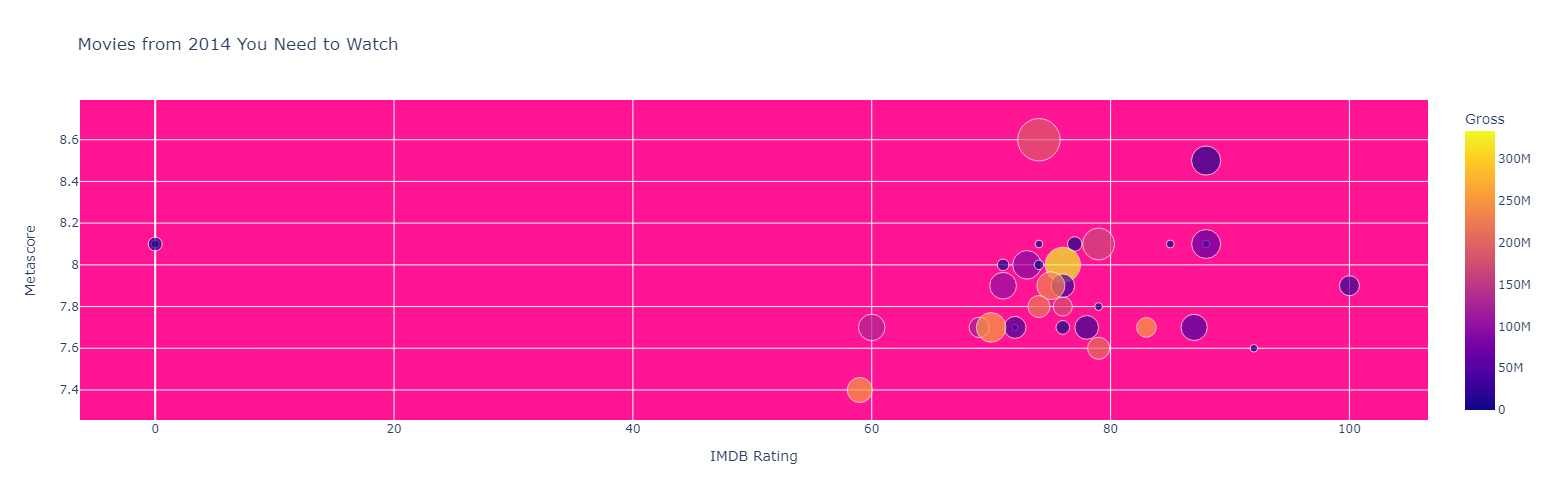

In [226]:
# Feel free to change the year in this next variable
year_to_check = 2014

df = movies[movies["Released_Year"] == year_to_check]
fig = px.scatter(df,
                 x="Meta_score",
                 y="IMDB_Rating",
                 color="Gross",
                 hover_name="Series_Title",
                 size="No_of_Votes",
                 size_max=30,
                 height=500,
                 width=1400,
                 title=f"Movies from {year_to_check} You Need to Watch",
                 labels=dict(IMDB_Rating="Metascore",
                             Meta_score="IMDB Rating"))

fig.update_layout(plot_bgcolor = "deeppink")

fig.show()

### Lets shed some light on the former chart:
<ul>
    <li>The position on the x axis (horizontal) is determined by the movies' IMDB Rating</li>
    <li>The position on the y axis (vertical) is determined by the movies' Metascore Rating</li>
    <li>The color is determined by the movies' total gross</li>
    <li>The size of the dot is determined by the number of votes on IMDB</li>

### Sometimes it is better not to concentrate on how high is the rating, but how many times has this movie been rated.
### Lets see if this helps us for some recomendations about movies we have to watch.

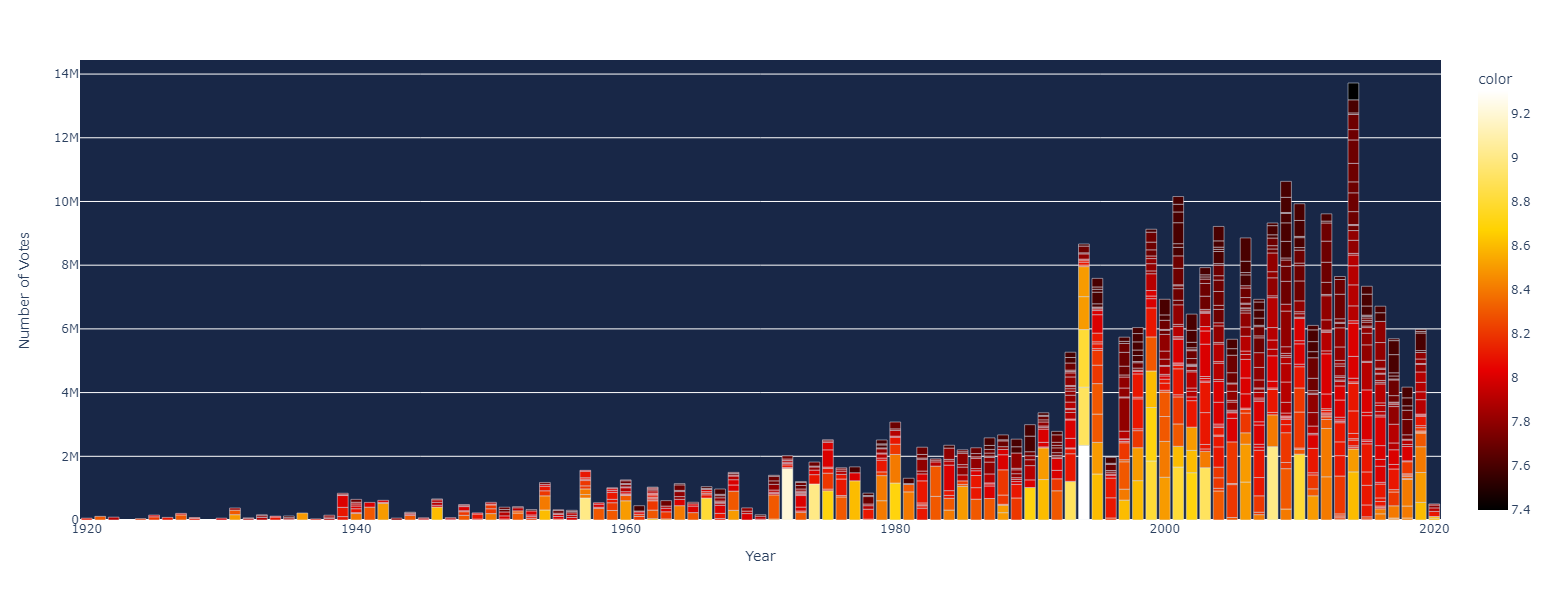

In [227]:
year_bar = px.bar(x=movies.Released_Year,
                  y=movies.No_of_Votes,
                  hover_name=movies.Series_Title,
                  color=movies.IMDB_Rating,
                  color_continuous_scale="Hot",
                  width=1500, 
                  height=600)

year_bar.update_layout(xaxis_title="Year",
                       yaxis_title="Number of Votes",
                       plot_bgcolor = "#182747") 

year_bar.show()

### In the former chart, the values of movies stack on each other. We see the movies with highest ranking are 'The Shawshank Redemption' and 'The Godfather', between others (the ones with the lightest colour).

### The longer the bar is, the more number of votes it has on IMDB (again The Shawsahnk Redemption wins, with "The Dark Knight" being the second).

### We may start wondering, which is the hottest director according to IMDB?
### We can group the data by director and sort the values in descending order by the number of movies

In [228]:
by_director = movies.groupby("Director").sum()
by_director.sort_values("Number_of_Movies", ascending=False, inplace=True)
by_director = by_director.head(100)
by_director

,Released_Year,IMDB_Rating,Meta_score,No_of_Votes,Gross,Number_of_Movies
Director,,,,,,
Alfred Hitchcock,27293,112.1,1270.0,2696577,119109404,14
Steven Spielberg,25879,104.4,1047.0,7817166,2478133165,13
Hayao Miyazaki,21941,88.2,908.0,2348718,39043577,11
Martin Scorsese,19956,81.7,826.0,6513530,538319198,10
Akira Kurosawa,19622,82.2,376.0,941599,4556619,10
...,...,...,...,...,...,...
Bryan Singer,6027,24.4,201.0,2101320,473691144,3
Edgar Wright,6028,23.3,243.0,1415121,145006001,3
Michelangelo Antonioni,3926,15.5,82.0,83055,0,2


### We create some new columns with the average values of IMDB Rating, Metascore and number of votes per each of the movies they have on the list.

In [229]:
by_director["Average_IMDB_Rating"] = by_director["IMDB_Rating"] / by_director["Number_of_Movies"]
by_director["Average_Meta_score"] = by_director["Meta_score"] / by_director["Number_of_Movies"]
by_director["Average_No_of_Votes"] = by_director["No_of_Votes"] / by_director["Number_of_Movies"]
by_director.drop(columns=["IMDB_Rating", "Meta_score", "No_of_Votes"], axis=1, inplace=True)
by_director.sort_values("Average_Meta_score", inplace=True, ascending=False)

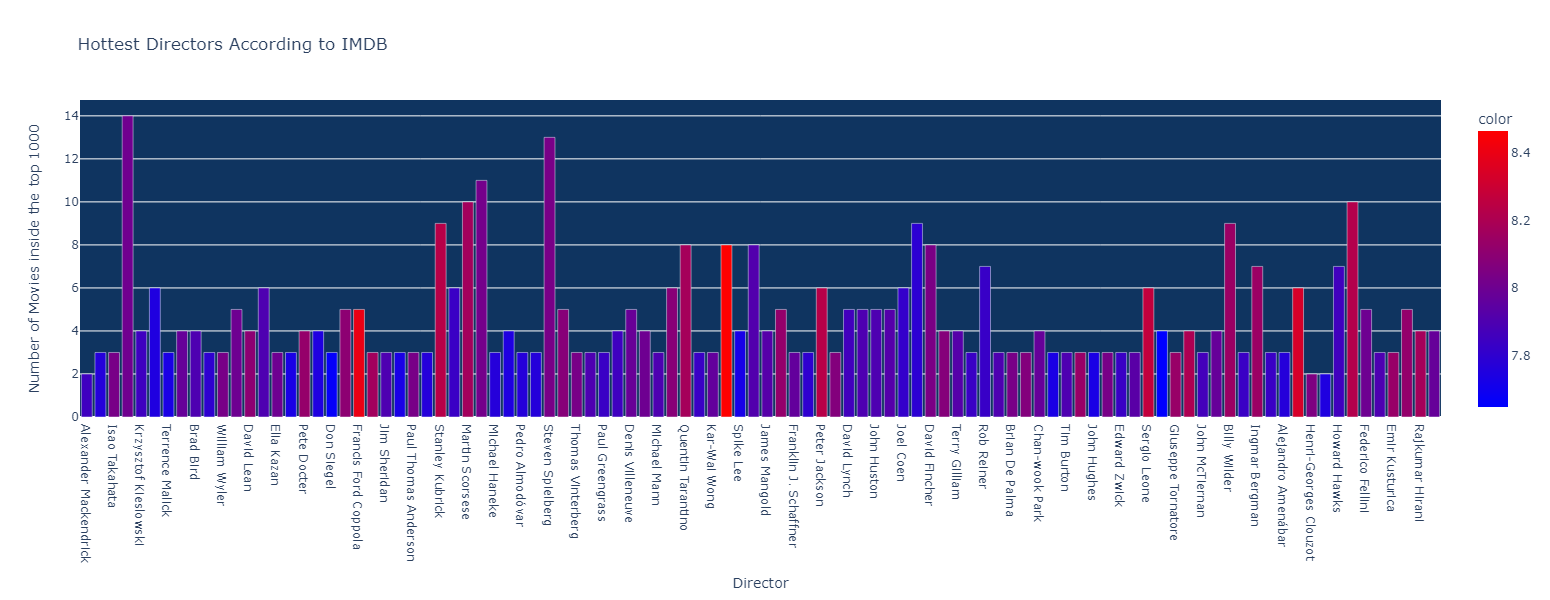

In [230]:
dir_bar = px.bar(x=by_director.index,
                 y=by_director.Number_of_Movies,
                 color=by_director.Average_IMDB_Rating,
                 color_continuous_scale='Bluered',
                 title='Hottest Directors According to IMDB',
                 height=600,
                 width=1200,
                 hover_name=by_director.Average_Meta_score)

dir_bar.update_layout(xaxis_title='Director', 
                      yaxis_title='Number of Movies inside the top 1000',
                      plot_bgcolor = "#0F3460")

fig.update_traces(line_color='#0000ff', line_width=5)

dir_bar.show()

### Explanation of the former chart:
<ul>
    <li>The height tells you how many movies from that director has made it on the 1000 best IMDB films (Alfred Hitchcock wins with 14 movies)</li>
    <li>The width tells you the order of these directors in the Metacritic ranking (Alexanfer Mackendrick is the first with 95.5% average rating from his 2 movies in the list)</li>
    <li>The color tells you the average rating of their movies in IMDB (Christopher Nolan wins with a 8.4625, slighlty aboce Francis Ford Coppola and Peter Jackson)</li>
 </ul>

### Hitchcock wins, having 14 movies inside the top 1000 IMDB movies.
### Now, the moment we have all been waiting for, the Final Battle of the Directors!

In [231]:
steven_spielberg = movies[movies["Director"] == "Steven Spielberg"]
spielberg =steven_spielberg.sort_values("Released_Year", ascending=True)
spielberg.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Number_of_Movies
415,Jaws,1975,A,124 min,Adventure,8.0,When a killer shark unleashes chaos on a beach...,87.0,Steven Spielberg,Roy Scheider,Robert Shaw,Richard Dreyfuss,Lorraine Gary,543388,260000000,1
988,Close Encounters. . .,1977,U,138 min,Drama,7.6,"Roy Neary, an electric lineman, watches how hi...",90.0,Steven Spielberg,Richard Dreyfuss,François Truffaut,Teri Garr,Melinda Dillon,184966,132088635,1
72,Raiders of the Lost Ark,1981,A,115 min,Action,8.4,"In 1936, archaeologist and adventurer Indiana ...",85.0,Steven Spielberg,Harrison Ford,Karen Allen,Paul Freeman,John Rhys-Davies,884112,248159971,1
688,E.T. the Extra-Terrestrial,1982,U,115 min,Family,7.8,A troubled child summons the courage to help a...,91.0,Steven Spielberg,Henry Thomas,Drew Barrymore,Peter Coyote,Dee Wallace,372490,435110554,1
682,The Color Purple,1985,U,154 min,Drama,7.8,A black Southern woman struggles to find her i...,78.0,Steven Spielberg,Danny Glover,Whoopi Goldberg,Oprah Winfrey,Margaret Avery,78321,98467863,1


In [232]:
alfred_hitchcock = movies[movies["Director"] == "Alfred Hitchcock"]
hitchcock =alfred_hitchcock.sort_values("Released_Year", ascending=True)
hitchcock.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Number_of_Movies
999,The 39 Steps,1935,0,86 min,Crime,7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,0,1
714,The Lady Vanishes,1938,0,96 min,Mystery,7.8,"While travelling in continental Europe, a rich...",98.0,Alfred Hitchcock,Margaret Lockwood,Michael Redgrave,Paul Lukas,May Whitty,47400,0,1
312,Rebecca,1940,Approved,130 min,Drama,8.1,A self-conscious woman juggles adjusting to he...,86.0,Alfred Hitchcock,Laurence Olivier,Joan Fontaine,George Sanders,Judith Anderson,123942,4360000,1
712,Shadow of a Doubt,1943,PG,108 min,Film-Noir,7.8,"A young girl, overjoyed when her favorite uncl...",94.0,Alfred Hitchcock,Teresa Wright,Joseph Cotten,Macdonald Carey,Henry Travers,59556,0,1
998,Lifeboat,1944,0,97 min,Drama,7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,0,1


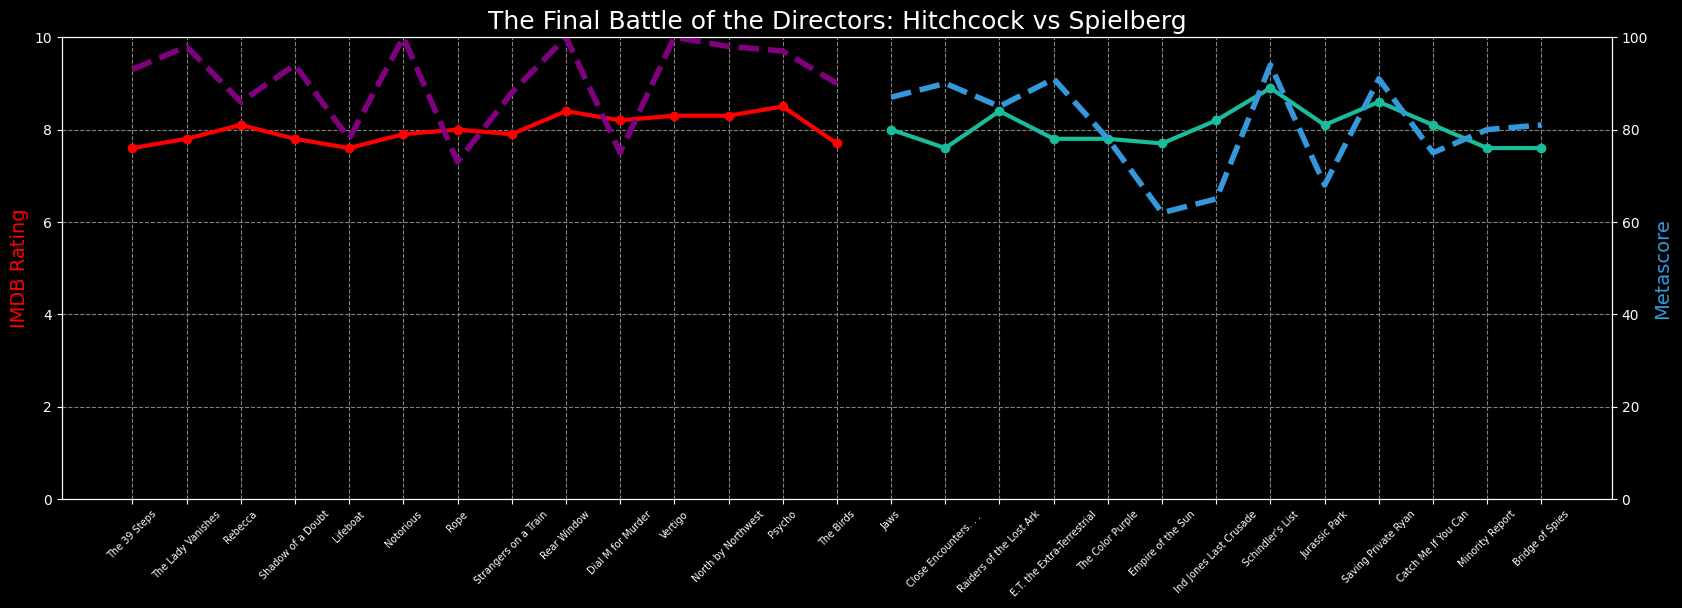

In [233]:
plt.figure(figsize=(20,6), dpi=100)
plt.title("The Final Battle of the Directors: Hitchcock vs Spielberg", fontsize=18)

plt.xticks(fontsize=7, rotation=45)
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylim([0, 10])
ax2.set_ylim([0, 100])

ax1.set_ylabel("IMDB Rating", color="red", fontsize=14)
ax2.set_ylabel("Metascore", color="#3498db", fontsize=14)

ax1.grid(color='grey', linestyle='--')
ax1.plot(hitchcock.Series_Title, hitchcock.IMDB_Rating, color="red", linewidth=3, marker="o")
ax2.plot(hitchcock.Series_Title, hitchcock.Meta_score, color="purple", linewidth=4, linestyle="--")

ax1.plot(spielberg.Series_Title, spielberg.IMDB_Rating, color="#1abc9c", linewidth=3, marker="o")
ax2.plot(spielberg.Series_Title, spielberg.Meta_score, color="#3498db", linewidth=4, linestyle="--")

plt.style.use(['dark_background'])

plt.show()

### In the former chart, we have Hitchcock's values on the left, and Spielberg's values on the right. The solid lines follow the scale on the left (0 to 10 for IMDB rating) and the dashed lines follow the scale on the right (0 to 100 for Metacritic).
### It is safe to say that Spielberg got his ass kicked.
### Now on to the Battle of the Actors

In [293]:
by_actor = movies.groupby("Star1").sum()
by_actor.sort_values("Gross", ascending=False, inplace=True)

### We will see the gross profits made by all the movies where some actors worked as main characters.
### The color here will be determined by the number of movies inside the top 1000 IMDB movies where they worked as main characters.

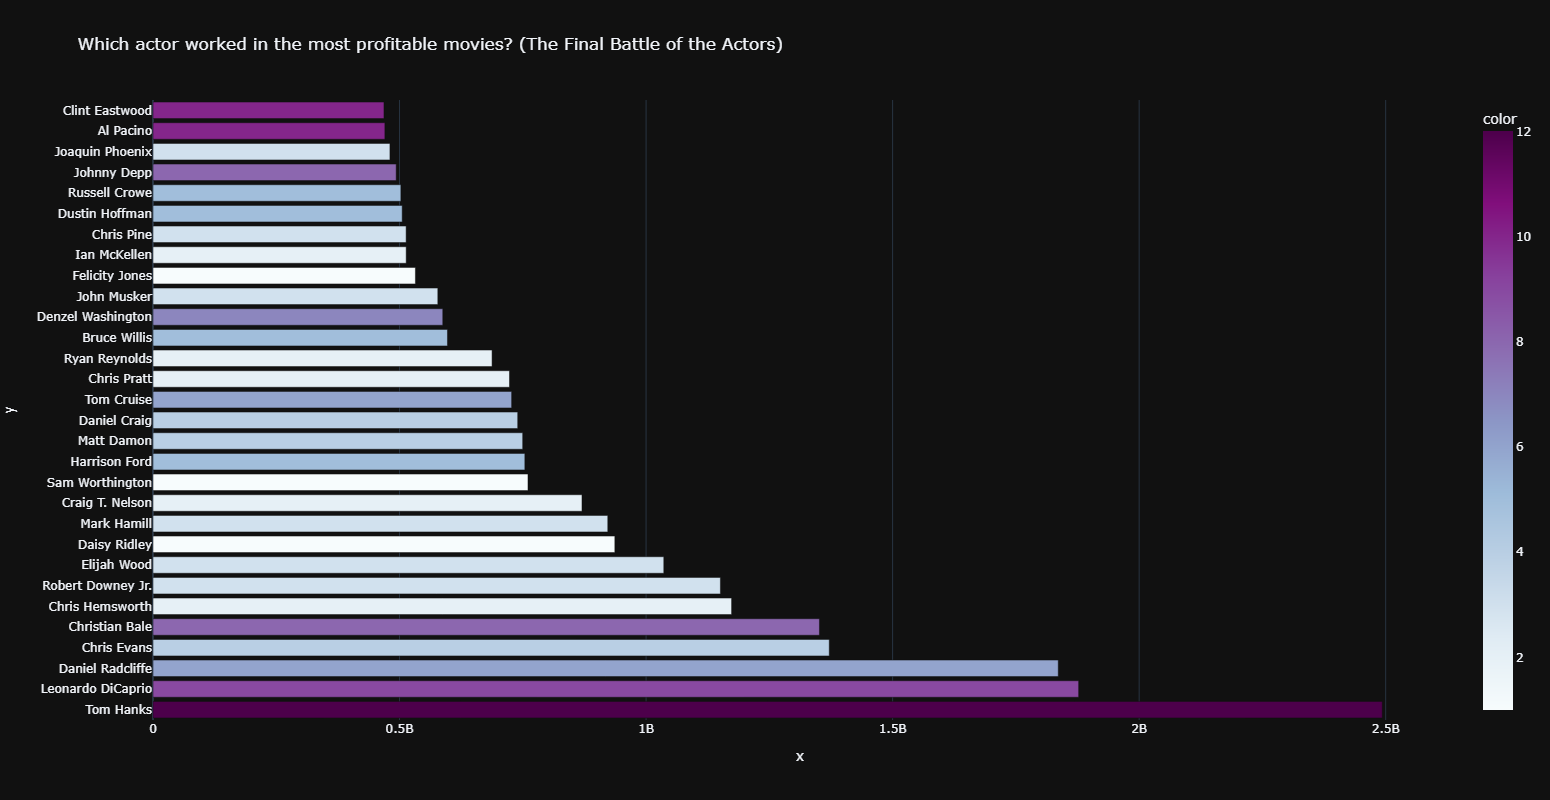

In [299]:
box = px.bar(by_actor[:30],
             x=by_actor.Gross[:30],
             y=by_actor.index[:30],
             color=by_actor.Number_of_Movies[:30],
             title="Which actor worked in the most profitable movies? (The Final Battle of the Actors)",
             color_continuous_scale="bupu",
             template="plotly_dark",
             orientation="h",
             height=800)
    
box.show()

### Want to watch a movie but don't know which? I've got you covered!
### Use the next sunburst chart, pick a year, then pick a genre and choose a movie.
### Hovering over the movies will tell you their IMDB and Metascore ratings.

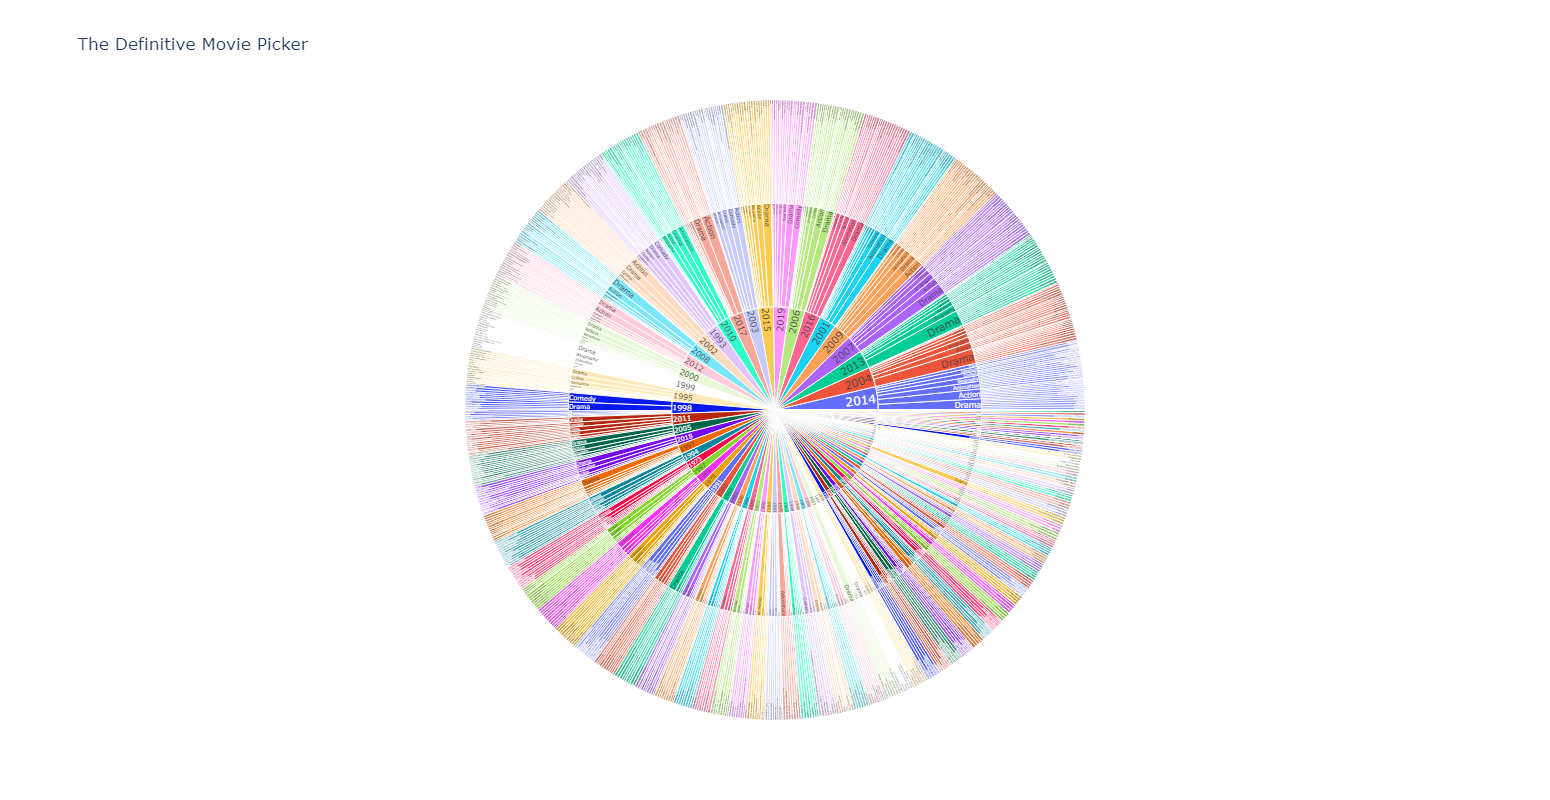

In [236]:
movies_per_year = movies.sort_values("Released_Year", ascending=True)

movies_burst = px.sunburst(movies_per_year,
                           path=["Released_Year",
                                 "Genre",
                                 "Series_Title"],
                           values="Meta_score",
                           title="The Definitive Movie Picker",
                           hover_name="IMDB_Rating")

movies_burst.update_layout(width=800,
                           height=800,)

movies_burst.show()